In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('cisco_res_2023_03_02.csv')

In [3]:
df.head()

,Unnamed: 0,n_exp,data_id,stat_test,n,max_iter,type,best_model,f1_score,ini_best,final_best,initial,final
0,0,0,0,ttest_rel,10,25,cv,XGBClassifier,0.775062,0.763354,0.779539,0.728844,0.751208
1,1,0,0,ttest_rel,10,25,tt,XGBClassifier,0.784859,0.767634,0.787308,0.728803,0.763312
2,2,0,0,ttest_ind,10,25,cv,RandomForestClassifier,0.777686,0.754730,0.774299,0.727867,0.750865
3,3,0,0,ttest_ind,10,25,tt,XGBClassifier,0.782849,0.756996,0.778282,0.727475,0.747029
4,4,0,0,mannwhitneyu,10,25,cv,DecisionTreeClassifier,0.755946,0.770856,0.770856,0.734373,0.740621


In [4]:
df['delta_improvement'] = df['final_best'].to_numpy() - df['ini_best'].to_numpy()

In [5]:
df.describe()

,Unnamed: 0,n_exp,data_id,n,max_iter,f1_score,ini_best,final_best,initial,final,delta_improvement
count,2480.000000,2480.000000,2480.000000,2480.000000,2480.000000,2480.000000,2480.000000,2480.000000,2480.000000,2480.000000,2480.000000
mean,1239.500000,2.951613,2.000000,29.677419,364.919355,0.828803,0.802663,0.827411,0.729564,0.795351,0.024749
std,716.058657,1.979544,1.414499,16.264032,439.421391,0.180157,0.181737,0.176021,0.180249,0.195357,0.017843
min,0.000000,0.000000,0.000000,10.000000,25.000000,0.000000,0.431768,0.450535,0.288493,0.353794,0.000000
25%,619.750000,1.000000,1.000000,10.000000,25.000000,0.786564,0.759806,0.787482,0.726786,0.758786,0.010175
50%,1239.500000,3.000000,2.000000,30.000000,100.000000,0.903840,0.873071,0.906711,0.812695,0.872764,0.025307
75%,1859.250000,5.000000,3.000000,50.000000,1000.000000,0.972653,0.949617,0.965281,0.855888,0.950629,0.039026
max,2479.000000,6.000000,4.000000,50.000000,1000.000000,1.000000,0.983551,0.995795,0.892886,0.987722,0.077816


<Axes: >

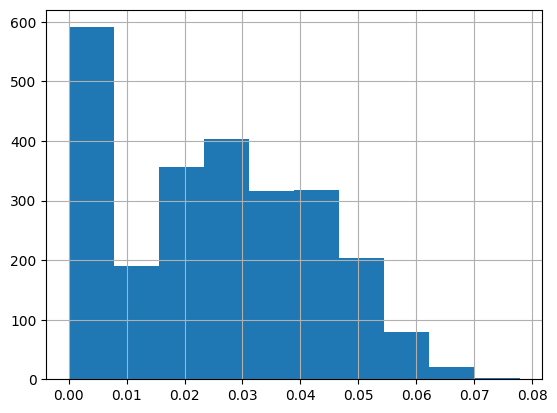

In [6]:
df['delta_improvement'].hist()

In [7]:
import seaborn as sns

<Axes: xlabel='stat_test', ylabel='delta_improvement'>

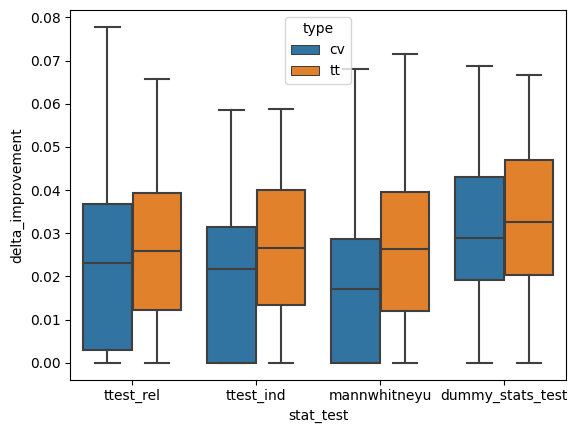

In [8]:
sns.boxplot(data=df,y='delta_improvement',x='stat_test',hue='type')

<Axes: xlabel='stat_test', ylabel='delta_improvement'>

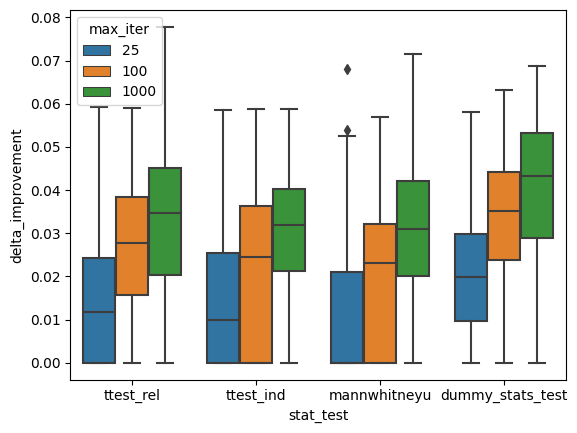

In [9]:
sns.boxplot(data=df,y='delta_improvement',x='stat_test',hue='max_iter')

<Axes: xlabel='stat_test', ylabel='delta_improvement'>

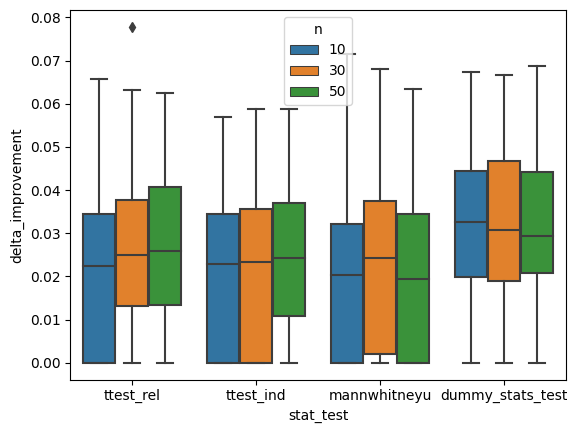

In [10]:
sns.boxplot(data=df,y='delta_improvement',x='stat_test',hue='n')

<Axes: xlabel='data_id', ylabel='delta_improvement'>

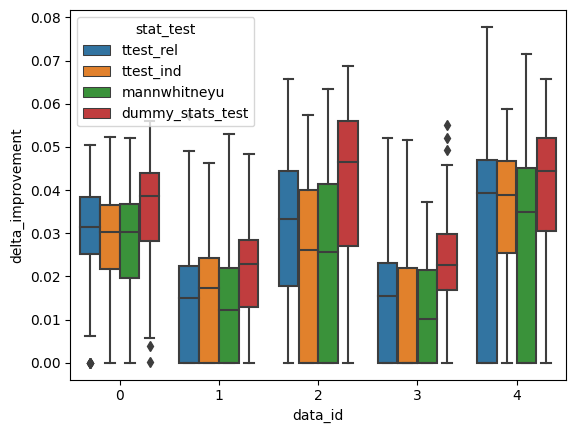

In [11]:
sns.boxplot(data=df,y='delta_improvement',x='data_id',hue='stat_test')

<Axes: xlabel='max_iter', ylabel='delta_improvement'>

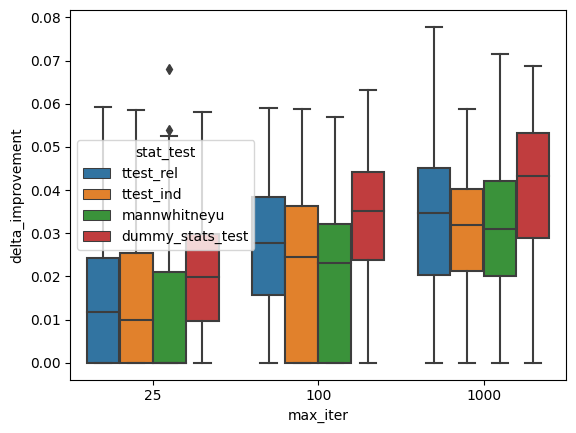

In [12]:
sns.boxplot(data=df,y='delta_improvement',x='max_iter',hue='stat_test')

<Axes: xlabel='n', ylabel='delta_improvement'>

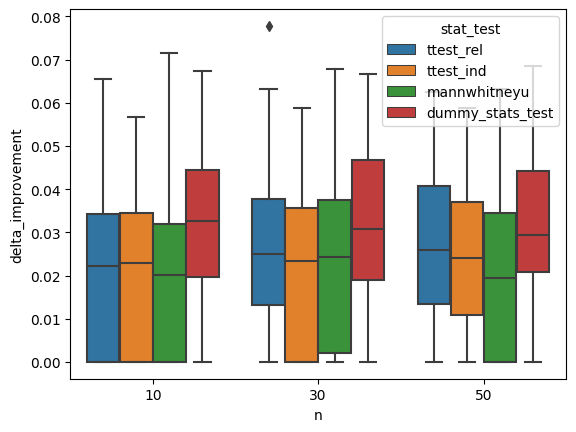

In [13]:
sns.boxplot(data=df,y='delta_improvement',x='n',hue='stat_test')